In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read the data
df = pd.read_csv('Pokemon.csv')

In [3]:
# Print the first 5 rows of the data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Get the shape of the data
df.shape

(800, 13)

In [5]:
# Check the data types of the variables
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
# Check missing values
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# Drop the Type2 column
df.drop('Type 2', axis=1, inplace=True)

In [9]:
# Rename column
df.rename(columns={'Attack': 'attack', 'Defense': 'defense'}, inplace=True)

In [10]:
# Only get the most correlated features
df = df[['attack', 'defense']]

In [11]:
# Show the first 5 rows of the data
df.head()

,attack,defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


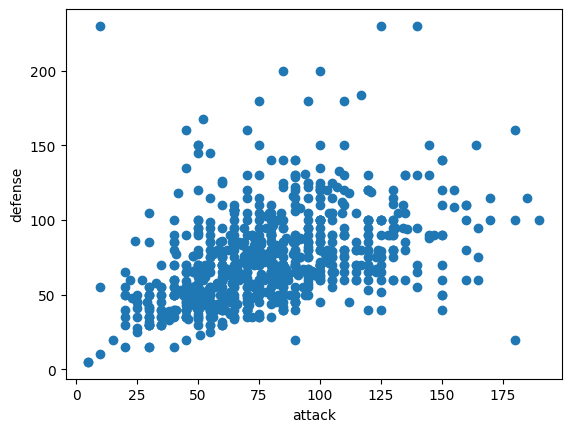

In [12]:
# Plot the data
plt.scatter(df['attack'], df['defense'])
plt.xlabel('attack')
plt.ylabel('defense')
plt.show()

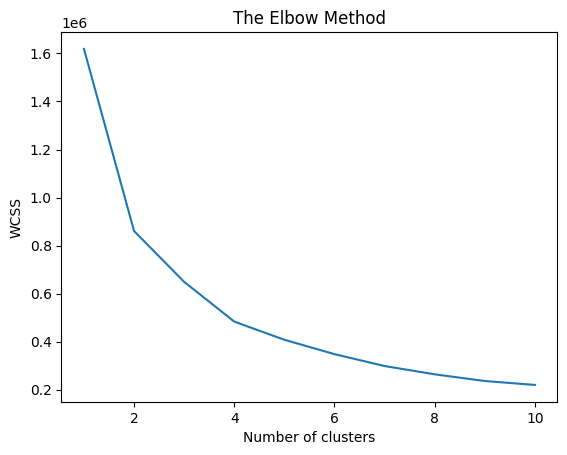

In [13]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

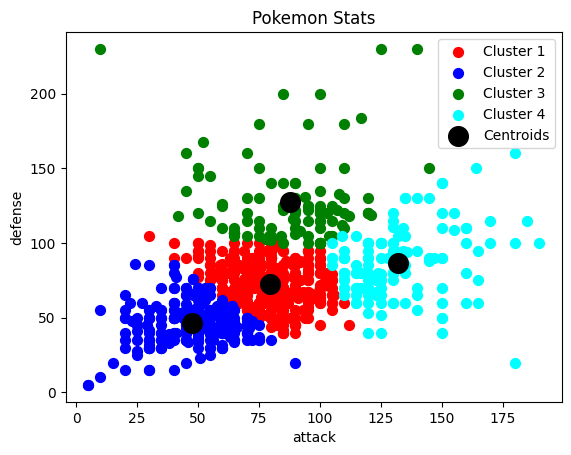

In [15]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['attack'], df[y_kmeans == 0]['defense'], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1]['attack'], df[y_kmeans == 1]['defense'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2]['attack'], df[y_kmeans == 2]['defense'], s=50, c='green', label='Cluster 3')
plt.scatter(df[y_kmeans == 3]['attack'], df[y_kmeans == 3]['defense'], s=50, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Pokemon Stats')
plt.xlabel('attack')
plt.ylabel('defense')
plt.legend()
plt.show()

In [16]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [17]:
# Show the first 5 rows of the data
df.head()

,attack,defense,Cluster
0,49,49,1
1,62,63,0
2,82,83,0
3,100,123,2
4,52,43,1


In [18]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [19]:
df['Cluster'].unique()

array([1, 0, 2, 3])

In [20]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))